In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
#grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
#                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
#                +"/Nanog/out/profile/wn/modisco.h5","r")
grp = h5py.File("modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

In [4]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [5]:
#Saving the seqlets

"""extracted_contrib_scores = []
extracted_hypothetical_scores = []
extracted_onehot_seqs = []
seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets

window_around = 50

#extract +/- 50bp around each seqlet
for seqlet in seqlets_list:
    example_idx = seqlet.coor.example_idx
    start = seqlet.coor.start
    end = seqlet.coor.end
    if ((start>=window_around) and (end<=1000-window_around)):
        extracted_contrib_scores.append(
            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])
        extracted_hypothetical_scores.append(
            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])
        extracted_onehot_seqs.append(
            onehot_seq[example_idx,start-window_around:end+window_around])

np.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))
np.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))
np.save("extracted_onehot.npy", np.array(extracted_onehot_seqs))"""

'extracted_contrib_scores = []\nextracted_hypothetical_scores = []\nextracted_onehot_seqs = []\nseqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets\n\nwindow_around = 50\n\n#extract +/- 50bp around each seqlet\nfor seqlet in seqlets_list:\n    example_idx = seqlet.coor.example_idx\n    start = seqlet.coor.start\n    end = seqlet.coor.end\n    if ((start>=window_around) and (end<=1000-window_around)):\n        extracted_contrib_scores.append(\n            nanog_profile_wn_contribs[example_idx,start-window_around:end+window_around])\n        extracted_hypothetical_scores.append(\n            nanog_profile_wn_hypimp[example_idx,start-window_around:end+window_around])\n        extracted_onehot_seqs.append(\n            onehot_seq[example_idx,start-window_around:end+window_around])\n\nnp.save("extracted_contrib_scores.npy", np.array(extracted_contrib_scores))\nnp.save("extracted_hypothetical_scores.npy", np.array(extracted_hypothetical_scores))\nnp.save("

In [6]:
!ls

523a1a82c23711ea9f9157d4c043164e.bin
523a1a82c23711ea9f9157d4c043164e_graph.bin
523a1a82c23711ea9f9157d4c043164e_graph.weights
523a1a82c23711ea9f9157d4c043164e.tree
agkm_50kseqlets_allpattern_hits.txt
agkm_50kseqlets_esrrb_hits.txt
agkm_50kseqlets_goingin.txt
agkm_50kseqlets_laststage.txt
agkmfewerseqles_newclustermerging.h5
agkmfewerseqles_noclustermerging.h5
agkmfewerseqles_withmotifsprereassignment.h5
agkm_fewerseqlets_allpattern_hits.txt
agkm_fewerseqlets_esrrb_hits.txt
agkm_fewerseqlets_goingin.txt
agkm_fewerseqlets_laststage.txt
agkm_r2_allpattern_hits.txt
agkm_r2_esrrb_hits.txt
agkm_r2_goingin.txt
agkm_r2_laststage.txt
BpNet-Viz.ipynb
commit0975f52_l6g2m0_results.hdf5
commit20e04f_corrthresh0_nomemeinit_4layerembedding_results.hdf5
commit20e04f_corrthresh0p1_nomemeinit_4layerembedding_results.hdf5
commit20e04f_nomemeinit_4layerembedding_results.hdf5
commit891181_memeinit_l6g2m0_results.hdf5
commit891181_nomemeinit_l6g2m0_results.hdf5
commit97f7d5b_agkm_default_results.hdf5
commi

In [7]:
#for i in range(10):
#    seqlets_list = loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets
#    modisco.visualization.viz_sequence.plot_weights(seqlets_list[i]["Nanog_profile_wn_contrib_scores"].fwd)

In [8]:
#visualize the saved patterns:
"""%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)"""

'%matplotlib inline\nfrom modisco.visualization import viz_sequence\nfor idx,pattern in enumerate(patterns):\n    print("pattern idx",idx)\n    print(len(pattern.seqlets))\n    viz_sequence.plot_weights(\n        pattern["Nanog_profile_wn_contrib_scores"].fwd)\n    viz_sequence.plot_weights(pattern["sequence"].fwd)'

/mnt/lab_data2/avanti/tfmodisco
commit 99299097c6ed0904960c15bf601fb951cf6949fd (HEAD -> reducemem3, origin/reducemem3)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Feb 10 10:21:20 2021 -0800

    further fixes
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 4.227170304
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.00754788601747714
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.37577224214168486 occurring at 0.0 implying a frac_neg of 0.6019793855866568
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.48571764379950555 occurring at -1.4484976418316364e-07 implying a frac_neg of 0.9444571409915278
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.026598883792757988  and  0.25093573331832886 with frac passing 0.047041
Passing windows frac was 0.047041 , which is above  0.03 ; adjus

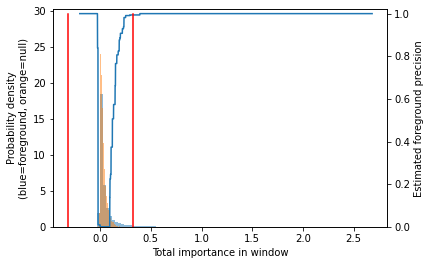

Got 97968 coords
After resolving overlaps, got 97968 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9700270905407408
MEMORY 6.195666944
97968 identified in total
1 activity patterns with support >= 2000 out of 2 possible patterns
Metacluster sizes:  [97965]
Idx to activities:  {0: '1'}
MEMORY 6.196334592
On metacluster 0
Metacluster size 97965 limited to 50000
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 50000
(Round 1) Computing coarse affmat
MEMORY 6.196334592
Beginning embedding computation
MEMORY 6.196334592


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 290 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done 790 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 1490 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 2390 tasks      | elapsed:   23.1s
[Parallel(n_jobs=10)]: Done 3490 tasks      | elapsed:   32.6s
[Parallel(n_jobs=10)]: Done 4790 tasks      | elapsed:   43.7s
[Parallel(n_jobs=10)]: Done 6290 tasks      | elapsed:   56.1s
[Parallel(n_jobs=10)]: Done 7990 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 9890 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 11950 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 14250 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 16750 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 19450 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 22350 tasks 

Constructing csr matrix...
csr matrix made in 14.020972967147827 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 50000 out of 50000 | elapsed:  2.9min finished


Constructing csr matrix...
csr matrix made in 14.557479858398438 s
Finished embedding computation in 1360.85 s
MEMORY 14.074732544
Starting affinity matrix computations
MEMORY 14.074732544
Batching in slices of size 1342


100%|██████████| 38/38 [13:01<00:00, 20.57s/it]

Finished affinity matrix computations in 782.17 s
MEMORY 14.075088896


(Round 1) Computed coarse affmat
MEMORY 13.474430976
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 13.474430976
Launching nearest neighbors affmat calculation job
MEMORY 13.474430976
Parallel runs completed
MEMORY 13.922717696
Job completed in: 388.36 s
MEMORY 13.922455552
Launching nearest neighbors affmat calculation job
MEMORY 13.922455552
Parallel runs completed
MEMORY 14.351634432
Job completed in: 366.18 s
MEMORY 14.351634432
(Round 1) Computed affinity matrix on nearest neighbors in 773.31 s
MEMORY 14.31883776
Filtered down to 41997 of 50000
(Round 1) Retained 41997 rows out of 50000 after filtering
MEMORY 14.31916544
(Round 1) Computing density adapted affmat
MEMORY 14.31916544
[t-SNE] Computed conditional probabilities for sample 1000 / 41997
[t-SNE] Computed conditional probabilities for sample 2000 / 41997
[t-SNE] Computed conditional probabilities for sample 3000 / 41997
[t-SNE] Computed conditional probabilities for sample 4000 / 41997
[t-SNE] Computed co

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7561596221748645


 12%|█▏        | 6/50 [09:47<1:12:26, 98.79s/it] 

Quality: 0.756257737241806


 26%|██▌       | 13/50 [17:40<43:49, 71.06s/it] 

Quality: 0.7563831136214795


 60%|██████    | 30/50 [37:33<21:53, 65.67s/it]

Quality: 0.7564157093885451


 70%|███████   | 35/50 [42:12<14:24, 57.64s/it]

Quality: 0.7566731316389486


100%|██████████| 50/50 [1:00:10<00:00, 72.20s/it]


Got 36 clusters after round 1
Counts:
{17: 919, 7: 2063, 10: 1803, 12: 1581, 3: 2693, 8: 1961, 4: 2527, 11: 1774, 13: 1546, 5: 2225, 16: 1084, 14: 1380, 9: 1944, 1: 3419, 0: 4668, 20: 657, 2: 3028, 15: 1165, 18: 766, 6: 2137, 19: 683, 21: 592, 31: 20, 30: 40, 23: 344, 35: 10, 28: 58, 27: 64, 24: 133, 32: 20, 25: 93, 29: 44, 22: 446, 26: 83, 34: 12, 33: 15}
MEMORY 14.06961664
(Round 1) Aggregating seqlets in each cluster
MEMORY 14.06961664
Aggregating for cluster 0 with 4668 seqlets
MEMORY 14.06961664
Trimming eliminated 0 seqlets out of 4668
Skipped 1 seqlets
Removed 12 duplicate seqlets
Aggregating for cluster 1 with 3419 seqlets
MEMORY 14.069620736
Trimming eliminated 0 seqlets out of 3419
Skipped 1 seqlets
Removed 7 duplicate seqlets
Aggregating for cluster 2 with 3028 seqlets
MEMORY 14.069620736
Trimming eliminated 0 seqlets out of 3028
Removed 14 duplicate seqlets
Aggregating for cluster 3 with 2693 seqlets
MEMORY 14.069620736
Trimming eliminated 0 seqlets out of 2693
Removed 27 d

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.1s
[Parallel(n_jobs=10)]: Done 470 tasks      | elapsed:    6.2s
[Parallel(n_jobs=10)]: Done 1470 tasks      | elapsed:   13.3s
[Parallel(n_jobs=10)]: Done 2870 tasks      | elapsed:   23.2s
[Parallel(n_jobs=10)]: Done 4670 tasks      | elapsed:   36.1s
[Parallel(n_jobs=10)]: Done 6870 tasks      | elapsed:   52.2s
[Parallel(n_jobs=10)]: Done 9470 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 12470 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 15870 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 19670 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 23870 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 28310 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 33310 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 38710 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done 41710 ou

Constructing csr matrix...
csr matrix made in 11.846987962722778 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 41729 out of 41729 | elapsed:  2.5min finished


Constructing csr matrix...
csr matrix made in 11.435955047607422 s
Finished embedding computation in 927.76 s
MEMORY 15.297540096
Starting affinity matrix computations
MEMORY 15.297277952
Batching in slices of size 1608


100%|██████████| 26/26 [07:26<00:00, 17.18s/it]

Finished affinity matrix computations in 447.25 s
MEMORY 15.297277952


(Round 2) Computed coarse affmat
MEMORY 14.800371712
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 14.800371712
Launching nearest neighbors affmat calculation job
MEMORY 15.107506176
Parallel runs completed
MEMORY 15.232884736
Job completed in: 435.44 s
MEMORY 15.232622592
Launching nearest neighbors affmat calculation job
MEMORY 15.232622592
Parallel runs completed
MEMORY 15.419973632
Job completed in: 518.4 s
MEMORY 15.419711488
(Round 2) Computed affinity matrix on nearest neighbors in 967.19 s
MEMORY 15.006138368
Not applying filtering for rounds above first round
MEMORY 15.006138368
(Round 2) Computing density adapted affmat
MEMORY 15.037239296
[t-SNE] Computed conditional probabilities for sample 1000 / 41729
[t-SNE] Computed conditional probabilities for sample 2000 / 41729
[t-SNE] Computed conditional probabilities for sample 3000 / 41729
[t-SNE] Computed conditional probabilities for sample 4000 / 41729
[t-SNE] Computed conditional probabilities for sample 50

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7322010420713774


  2%|▏         | 1/50 [00:57<46:33, 57.01s/it]

Quality: 0.7340107999623549


  6%|▌         | 3/50 [03:35<53:47, 68.67s/it]

Quality: 0.7342343444473574


  8%|▊         | 4/50 [04:54<55:06, 71.89s/it]

Quality: 0.7342852098214336


 10%|█         | 5/50 [06:08<54:17, 72.38s/it]

Quality: 0.7348613971762101


 46%|████▌     | 23/50 [30:09<33:16, 73.95s/it]   

Quality: 0.735031852765332


 72%|███████▏  | 36/50 [44:46<13:54, 59.64s/it]

Quality: 0.7350370206481343


100%|██████████| 50/50 [1:00:58<00:00, 73.17s/it]


Got 39 clusters after round 2
Counts:
{0: 4751, 3: 2771, 13: 1420, 1: 3509, 7: 2057, 11: 1767, 5: 2354, 12: 1686, 34: 20, 24: 256, 20: 524, 4: 2508, 14: 1185, 17: 820, 21: 496, 10: 1802, 8: 1994, 25: 177, 19: 542, 2: 3118, 6: 2065, 16: 874, 9: 1885, 30: 72, 36: 11, 15: 1028, 23: 263, 18: 758, 37: 10, 31: 46, 32: 44, 29: 76, 22: 438, 27: 119, 38: 10, 28: 81, 35: 16, 26: 156, 33: 20}
MEMORY 15.078539264
(Round 2) Aggregating seqlets in each cluster
MEMORY 15.078539264
Aggregating for cluster 0 with 4751 seqlets
MEMORY 15.078539264
Trimming eliminated 0 seqlets out of 4751
Removed 216 duplicate seqlets
Aggregating for cluster 1 with 3509 seqlets
MEMORY 15.078539264
Trimming eliminated 0 seqlets out of 3509
Skipped 1 seqlets
Removed 96 duplicate seqlets
Aggregating for cluster 2 with 3118 seqlets
MEMORY 15.07854336
Trimming eliminated 0 seqlets out of 3118
Removed 74 duplicate seqlets
Aggregating for cluster 3 with 2771 seqlets
MEMORY 15.07854336
Trimming eliminated 0 seqlets out of 2771
R

Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00454161
After 4 runs, maximum modularity is Q = 0.00454167
After 18 runs, maximum modularity is Q = 0.00454203
Louvain completed 38 runs in 36.75714039802551 seconds
Similarity is 0.8743118; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 5.9826507568359375 seconds
MEMORY 15.213617152
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.0050971
After 2 runs, maximum modularity is Q = 0.00509741
After 3 runs, maximum modularity is Q = 0.00509749
Louvain completed 23 runs in 19.226727724075317 seconds
Similarity is 0.86179835; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 5.7875940799713135 seconds
MEMORY 15.207579648
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00744901
Louvain completed 21 runs in 16.012732982635498 seconds
Similarity is 0.7859383; is_dissimilar is

Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00569521
After 5 runs, maximum modularity is Q = 0.00577104
Louvain completed 25 runs in 13.017910242080688 seconds
Similarity is 0.7600992; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.01274418830871582 seconds
MEMORY 15.067373568
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00409699
After 2 runs, maximum modularity is Q = 0.0043624
After 3 runs, maximum modularity is Q = 0.00476095
After 7 runs, maximum modularity is Q = 0.0049405
Louvain completed 27 runs in 14.48758840560913 seconds
Similarity is 0.7136414; is_dissimilar is True
Inspecting for spurious merging
Wrote graph to binary file in 0.007965803146362305 seconds
MEMORY 15.067373568
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00620169
After 3 runs, maximum modularity is Q = 0.00628582
Louvain completed 23 runs in 11.745251893997192 

Collapsing 1 & 7 with crosscontam 0.7630233908641976 and sim 0.861149841684182
Collapsing 10 & 11 with crosscontam 0.6840879422222224 and sim 0.8559102885032961
Aborting collapse as 11 & 21 have cross-contam 0.09513696543209893 and sim 0.4481399034518663
Collapsing 22 & 32 with crosscontam 0.6840055933977456 and sim 0.8509872840240437
Trimming eliminated 0 seqlets out of 4673
Removed 47 duplicate seqlets
Trimming eliminated 1 seqlets out of 3923
Removed 10 duplicate seqlets
Trimming eliminated 0 seqlets out of 8538
Skipped 6 seqlets
Removed 44 duplicate seqlets
Trimming eliminated 0 seqlets out of 2178
Removed 12 duplicate seqlets
Trimming eliminated 0 seqlets out of 2320
Removed 8 duplicate seqlets
Trimming eliminated 0 seqlets out of 10400
Removed 23 duplicate seqlets
Removed 3 duplicate seqlets
Trimming eliminated 0 seqlets out of 4293
Skipped 1 seqlets
Removed 19 duplicate seqlets
Trimming eliminated 0 seqlets out of 10408
Removed 36 duplicate seqlets
Trimming eliminated 0 seqlets 

In [9]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
reload(modisco.util)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

N_CORES = 10
workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,#[5,9,13,17,21],
    flank_size=10,
    target_seqlet_fdr=0.01,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.03,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=N_CORES),
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=N_CORES,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)

In [10]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "v0.5.11.0_reducemem.hdf5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 10449
Task 0 hypothetical scores:


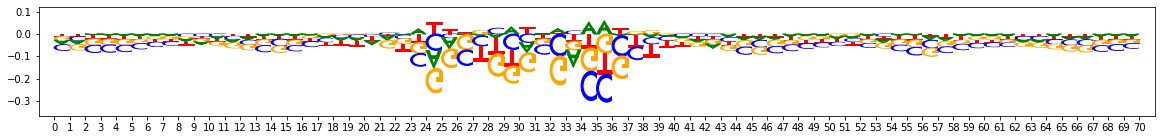

Task 0 actual importance scores:


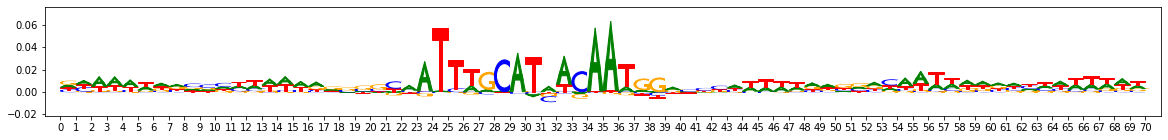

onehot, fwd and rev:


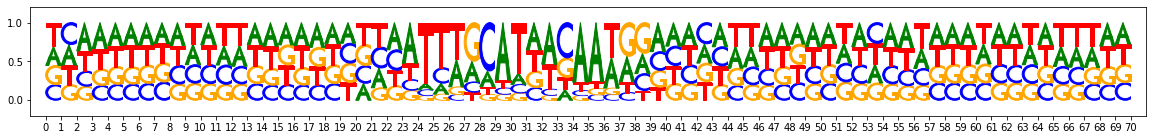

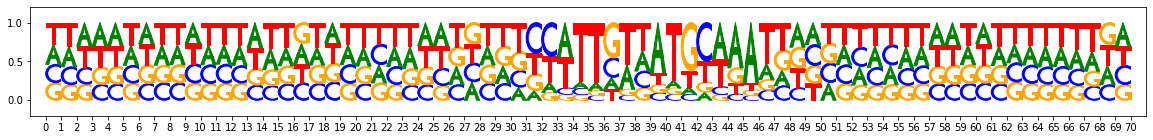

metacluster_0 pattern_1
total seqlets: 7117
Task 0 hypothetical scores:


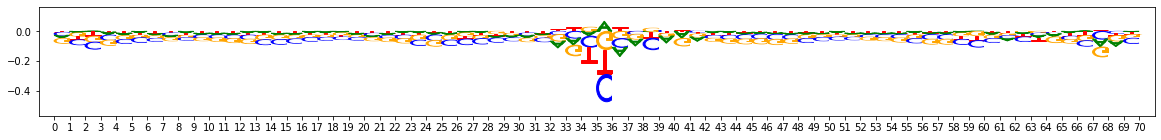

Task 0 actual importance scores:


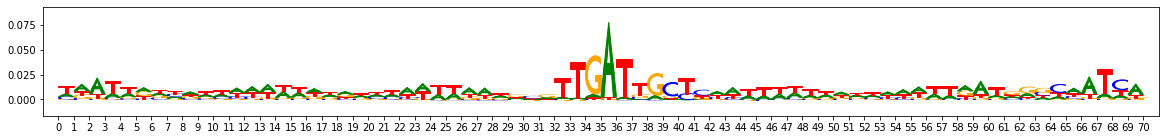

onehot, fwd and rev:


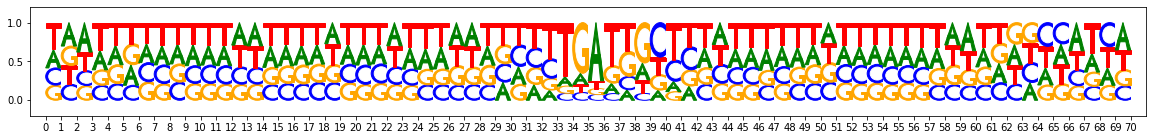

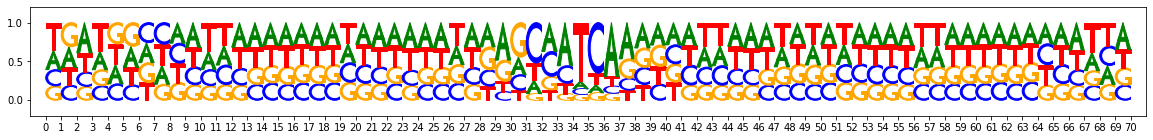

metacluster_0 pattern_2
total seqlets: 3051
Task 0 hypothetical scores:


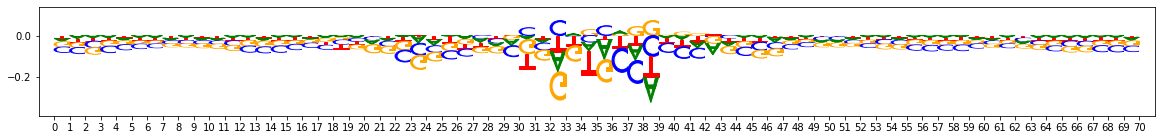

Task 0 actual importance scores:


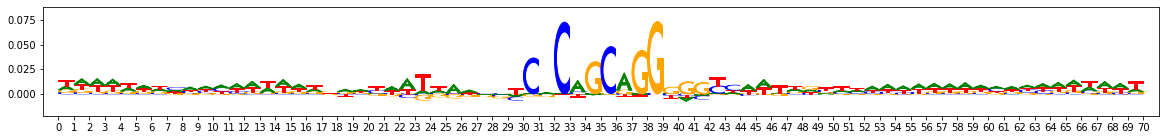

onehot, fwd and rev:


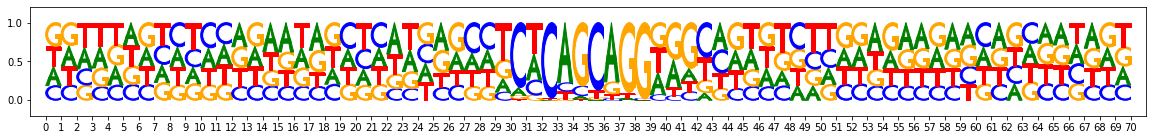

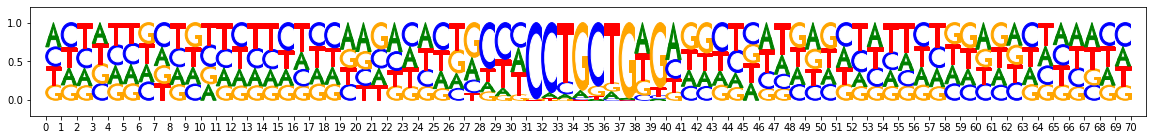

metacluster_0 pattern_3
total seqlets: 2581
Task 0 hypothetical scores:


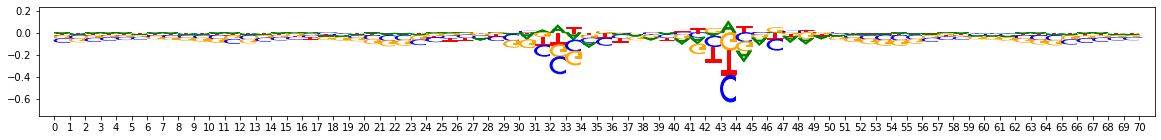

Task 0 actual importance scores:


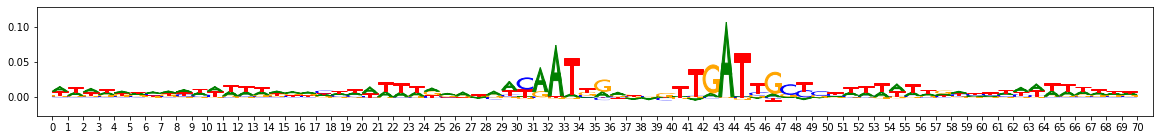

onehot, fwd and rev:


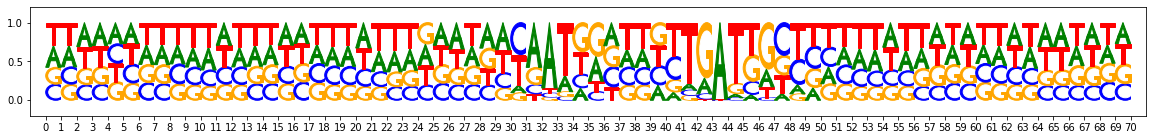

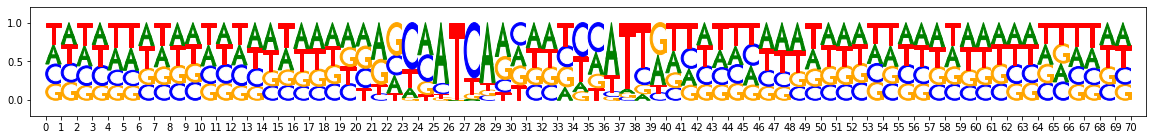

metacluster_0 pattern_4
total seqlets: 2353
Task 0 hypothetical scores:


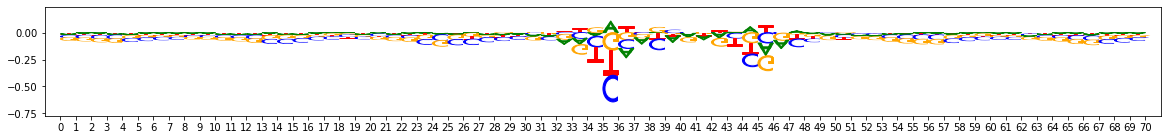

Task 0 actual importance scores:


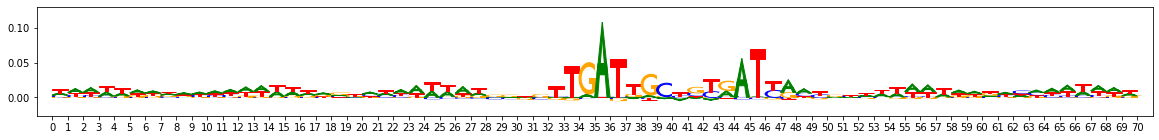

onehot, fwd and rev:


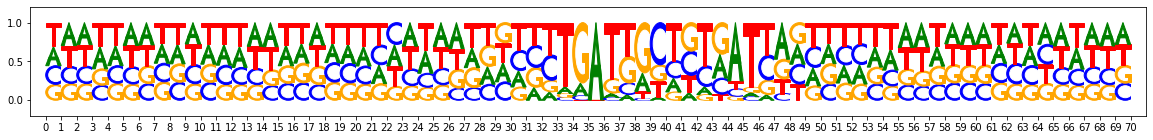

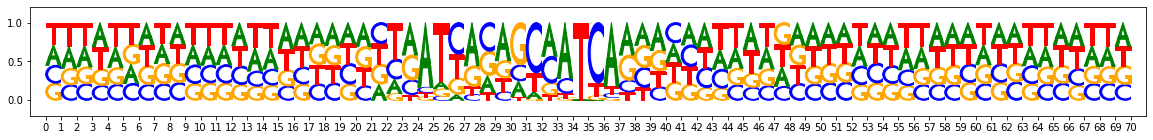

metacluster_0 pattern_5
total seqlets: 2172
Task 0 hypothetical scores:


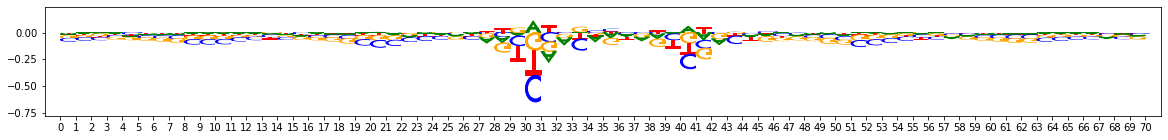

Task 0 actual importance scores:


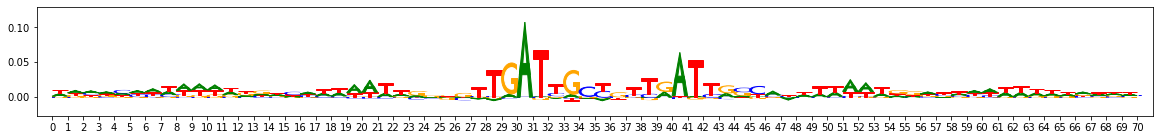

onehot, fwd and rev:


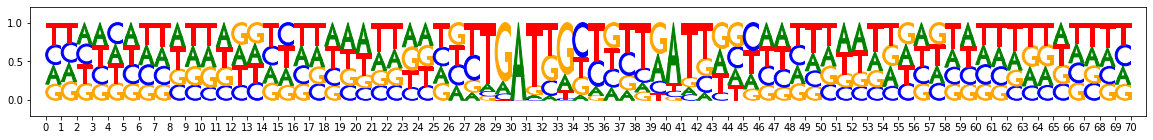

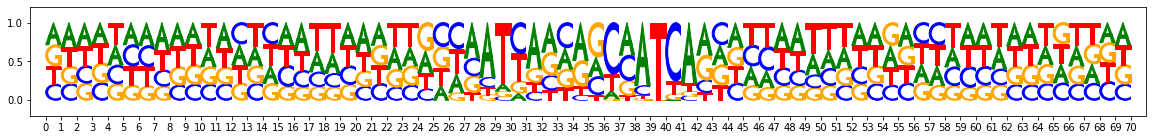

metacluster_0 pattern_6
total seqlets: 1665
Task 0 hypothetical scores:


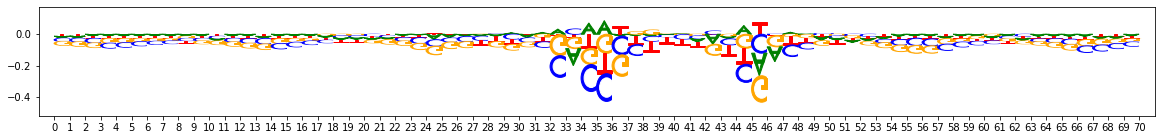

Task 0 actual importance scores:


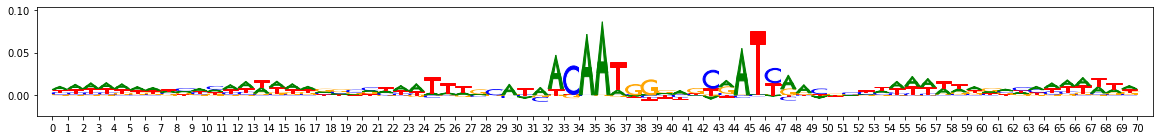

onehot, fwd and rev:


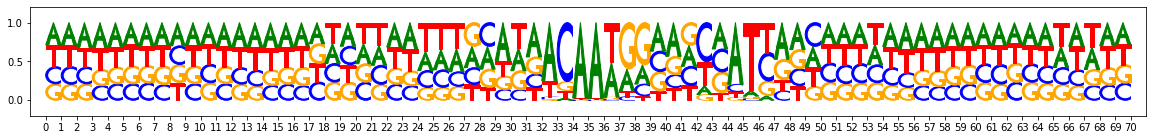

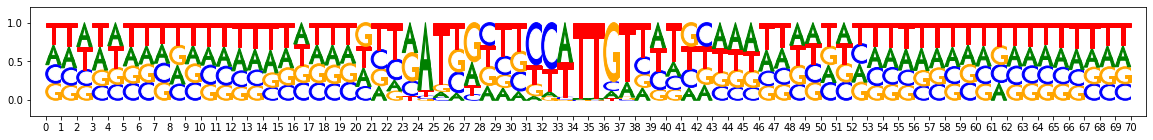

metacluster_0 pattern_7
total seqlets: 1399
Task 0 hypothetical scores:


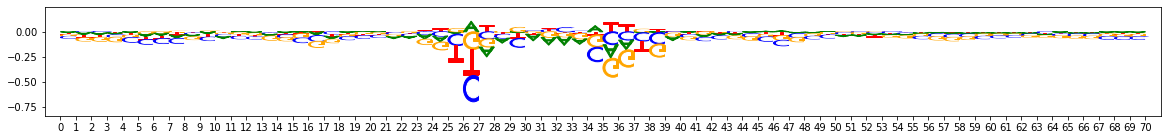

Task 0 actual importance scores:


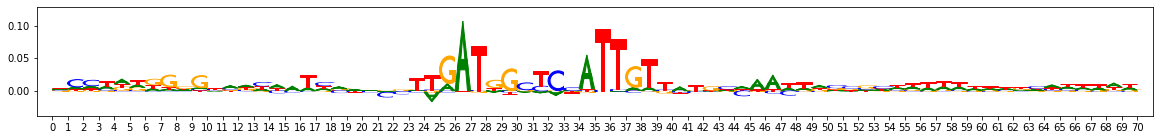

onehot, fwd and rev:


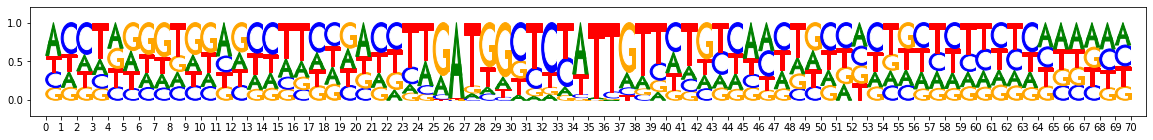

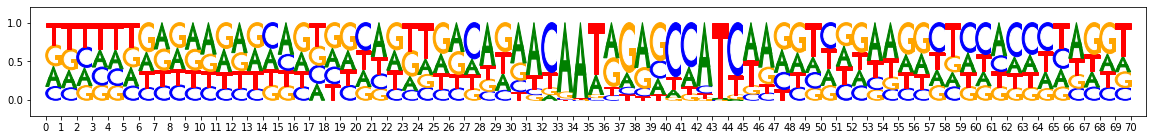

metacluster_0 pattern_8
total seqlets: 1350
Task 0 hypothetical scores:


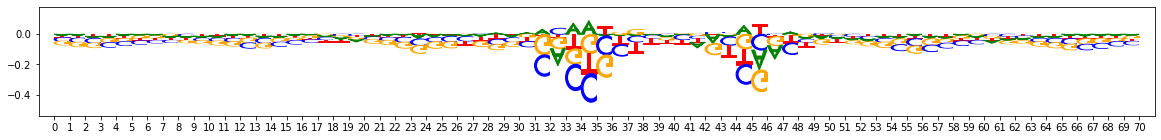

Task 0 actual importance scores:


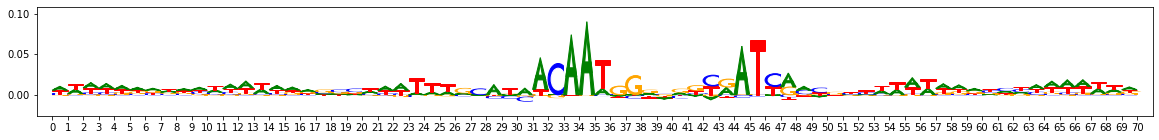

onehot, fwd and rev:


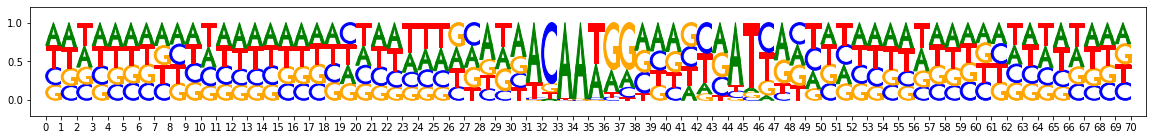

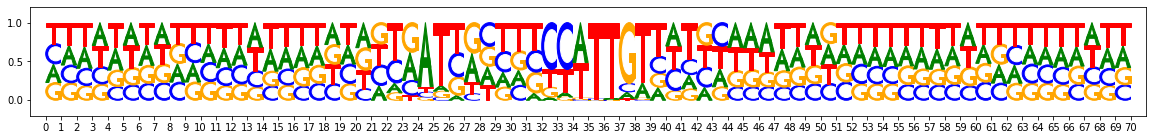

metacluster_0 pattern_9
total seqlets: 1025
Task 0 hypothetical scores:


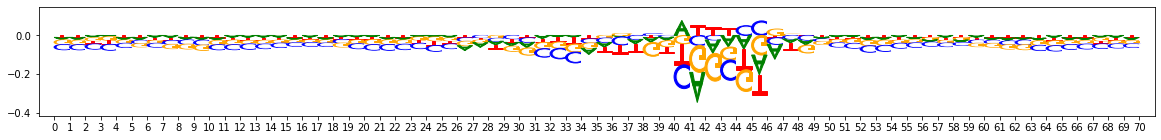

Task 0 actual importance scores:


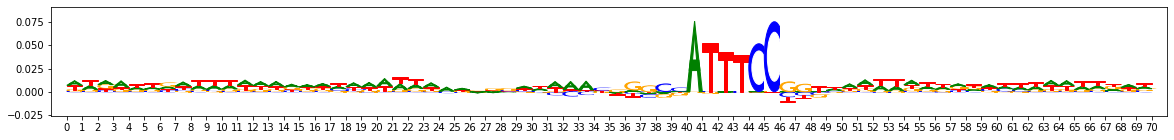

onehot, fwd and rev:


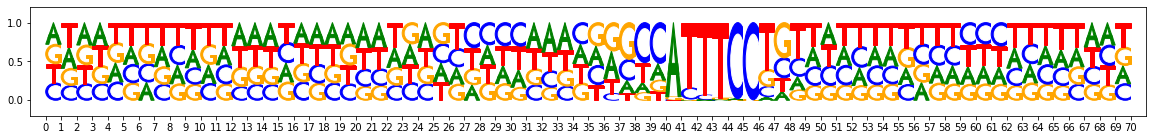

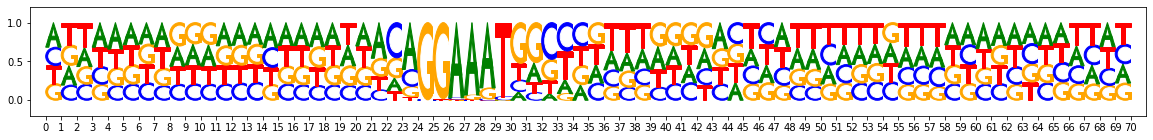

metacluster_0 pattern_10
total seqlets: 983
Task 0 hypothetical scores:


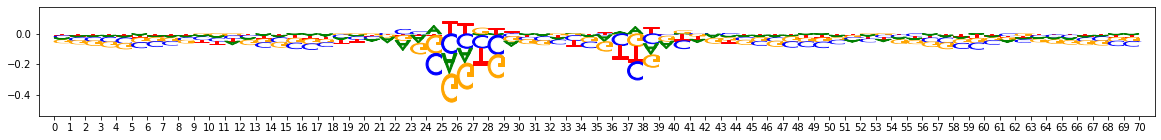

Task 0 actual importance scores:


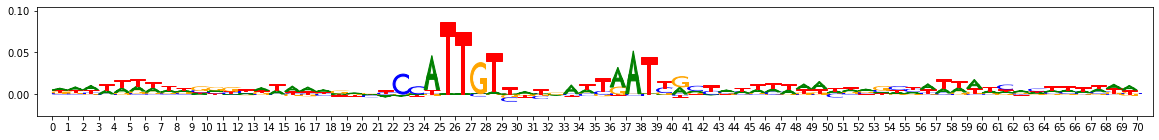

onehot, fwd and rev:


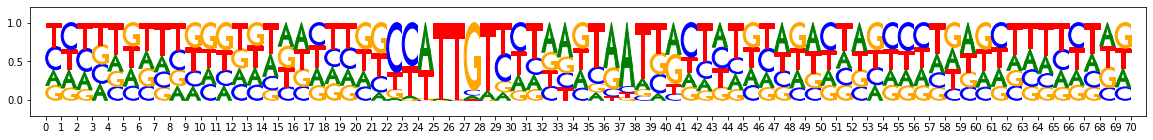

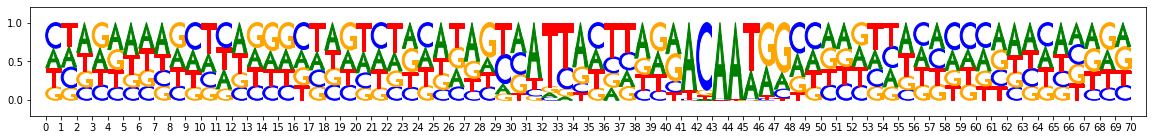

metacluster_0 pattern_11
total seqlets: 841
Task 0 hypothetical scores:


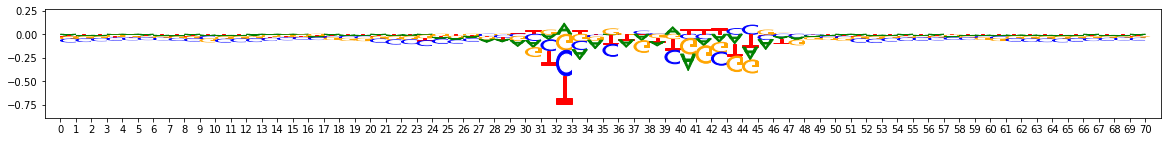

Task 0 actual importance scores:


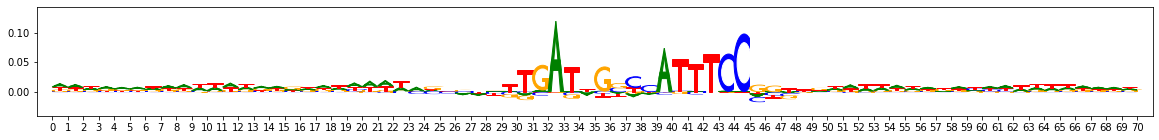

onehot, fwd and rev:


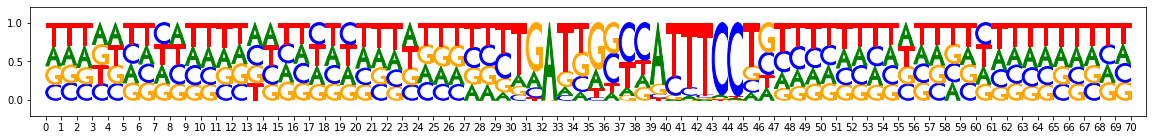

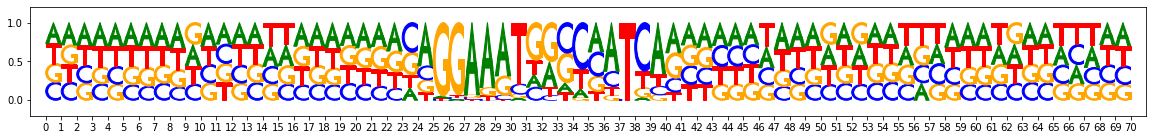

metacluster_0 pattern_12
total seqlets: 790
Task 0 hypothetical scores:


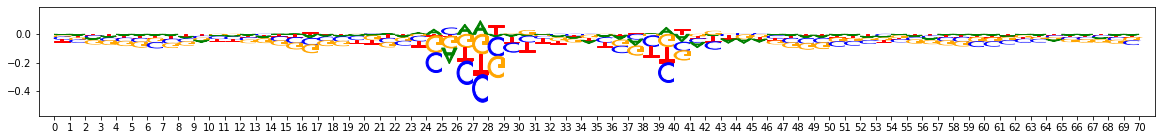

Task 0 actual importance scores:


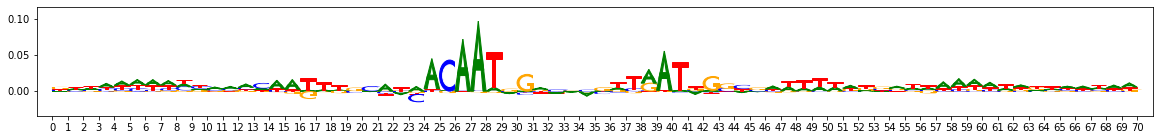

onehot, fwd and rev:


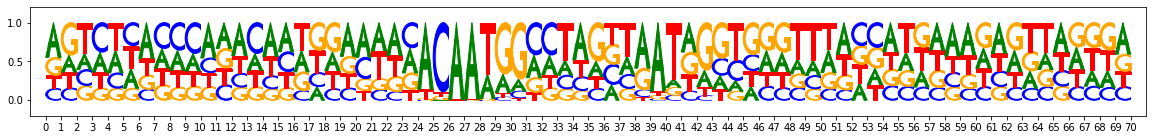

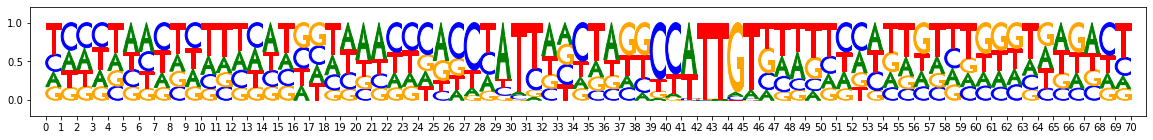

metacluster_0 pattern_13
total seqlets: 668
Task 0 hypothetical scores:


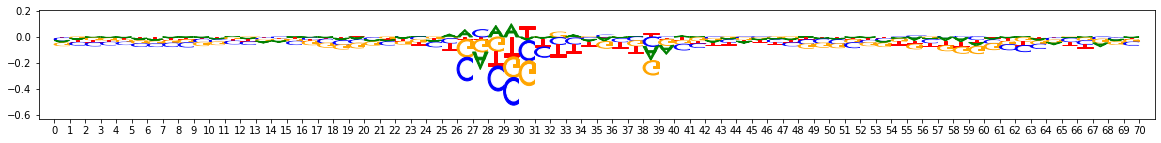

Task 0 actual importance scores:


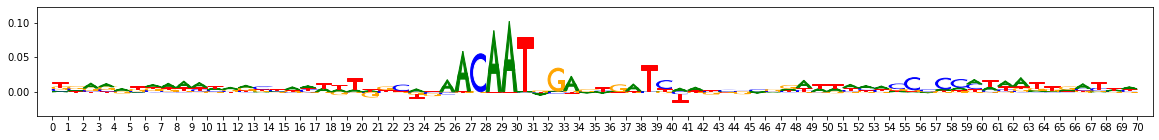

onehot, fwd and rev:


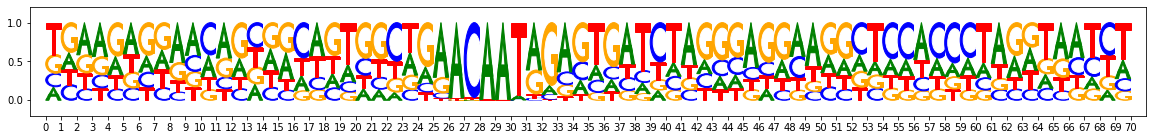

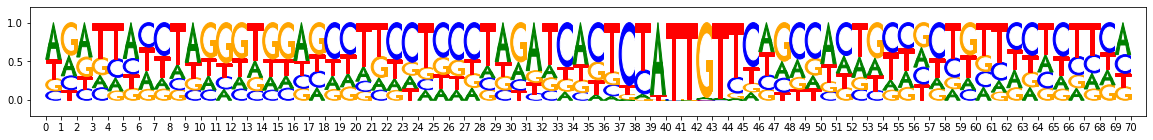

metacluster_0 pattern_14
total seqlets: 476
Task 0 hypothetical scores:


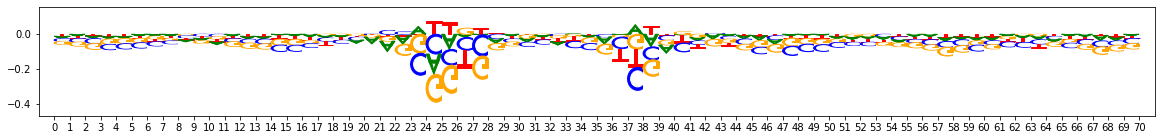

Task 0 actual importance scores:


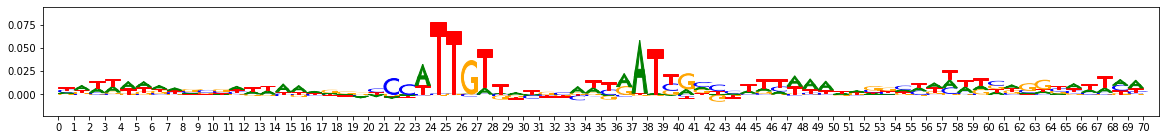

onehot, fwd and rev:


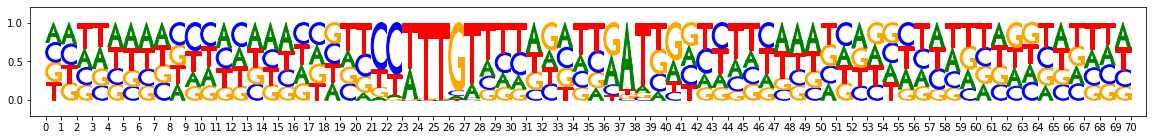

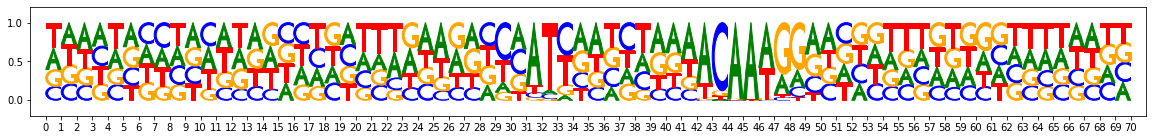

metacluster_0 pattern_15
total seqlets: 415
Task 0 hypothetical scores:


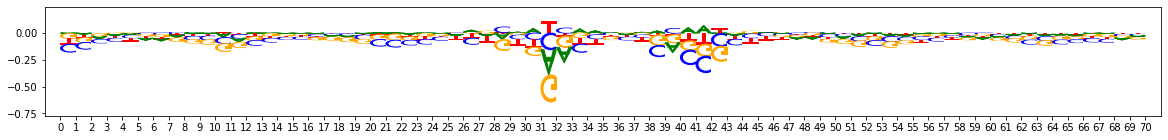

Task 0 actual importance scores:


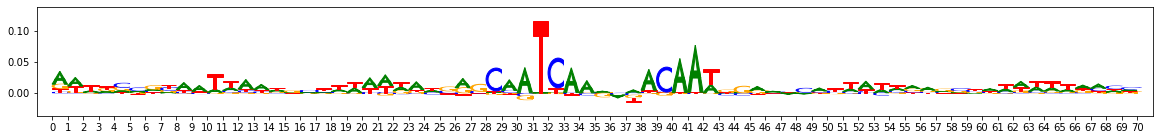

onehot, fwd and rev:


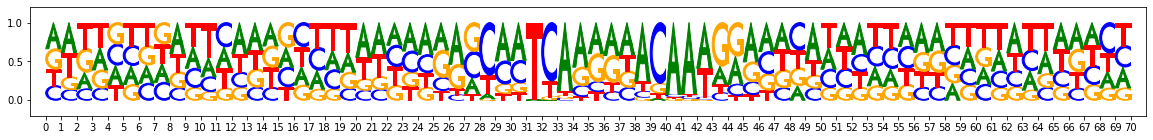

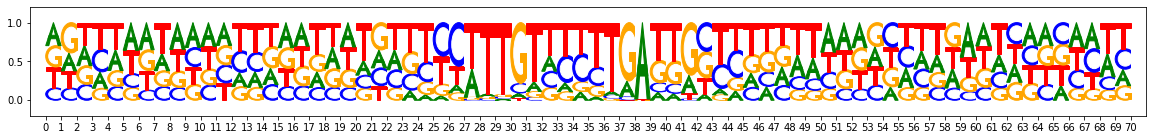

metacluster_0 pattern_16
total seqlets: 416
Task 0 hypothetical scores:


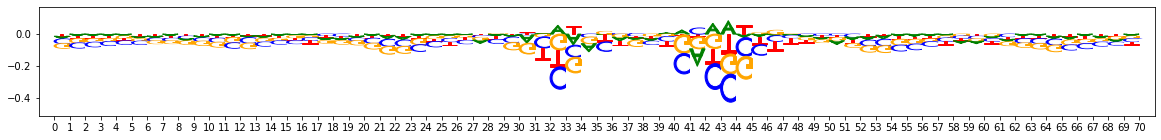

Task 0 actual importance scores:


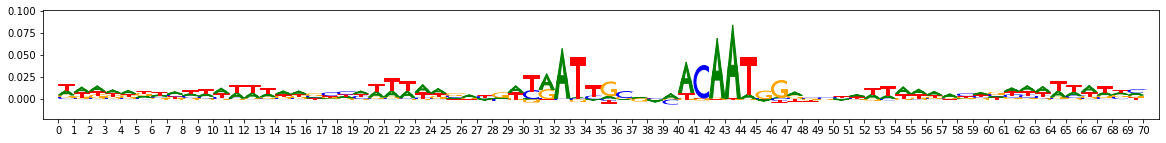

onehot, fwd and rev:


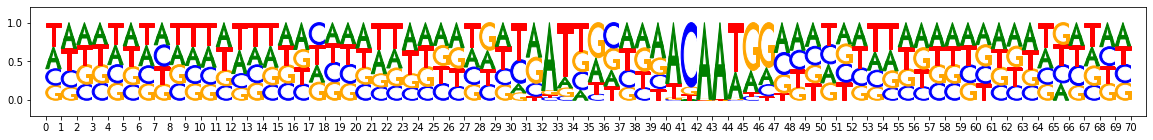

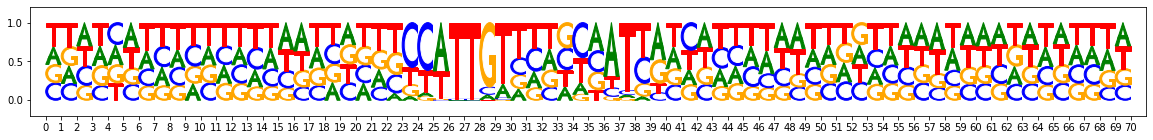

metacluster_0 pattern_17
total seqlets: 178
Task 0 hypothetical scores:


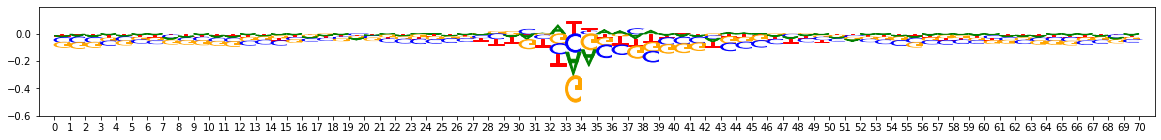

Task 0 actual importance scores:


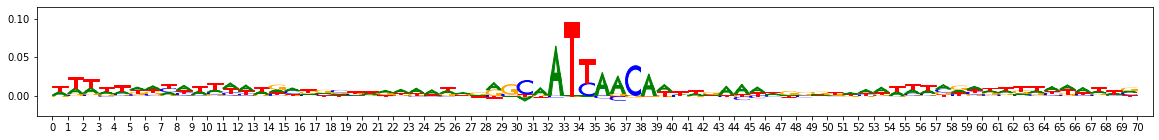

onehot, fwd and rev:


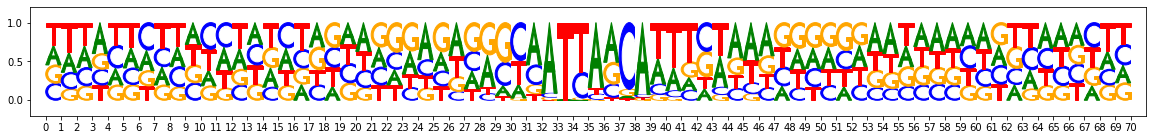

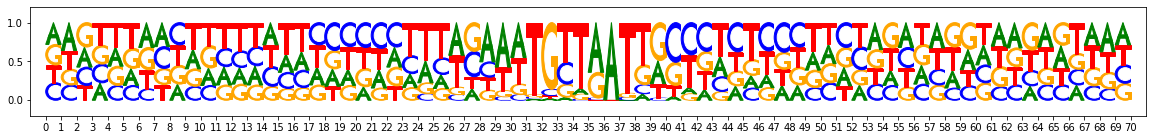

metacluster_0 pattern_18
total seqlets: 171
Task 0 hypothetical scores:


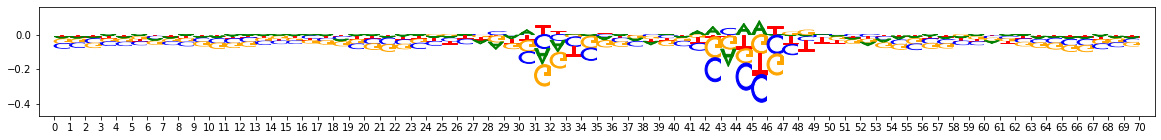

Task 0 actual importance scores:


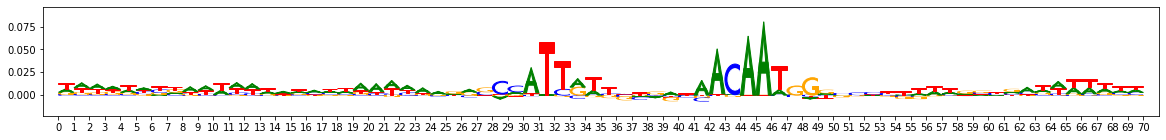

onehot, fwd and rev:


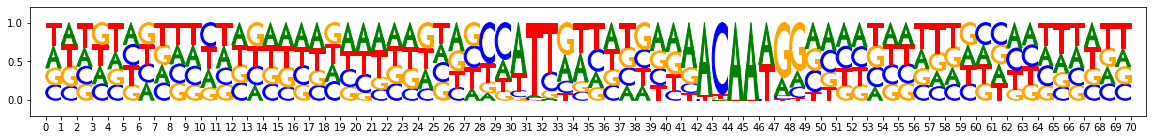

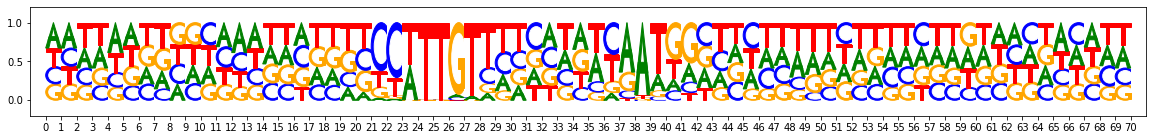

metacluster_0 pattern_19
total seqlets: 170
Task 0 hypothetical scores:


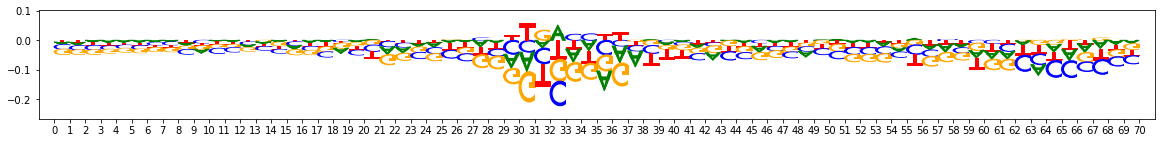

Task 0 actual importance scores:


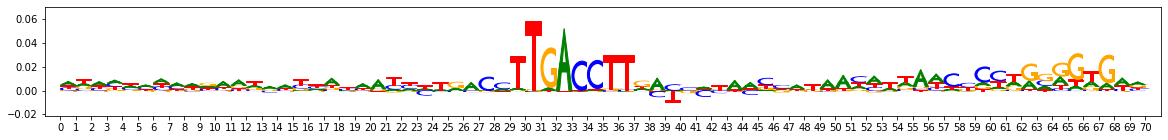

onehot, fwd and rev:


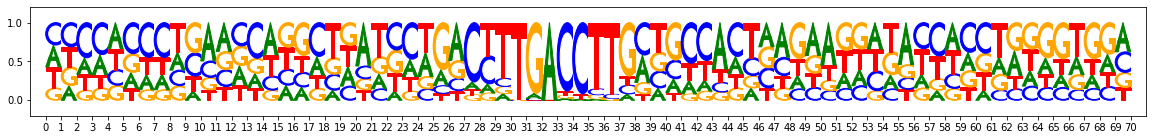

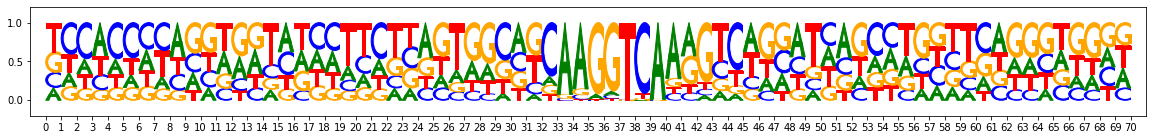

metacluster_0 pattern_20
total seqlets: 126
Task 0 hypothetical scores:


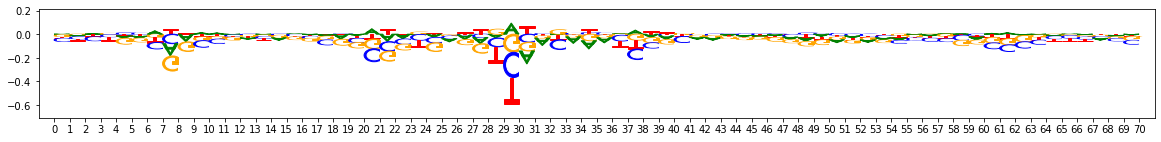

Task 0 actual importance scores:


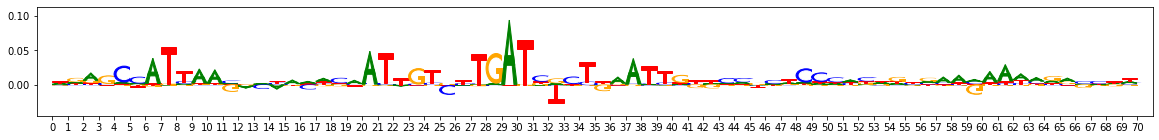

onehot, fwd and rev:


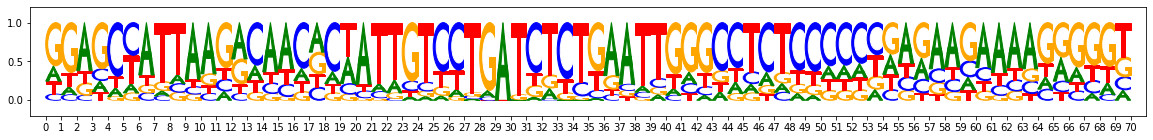

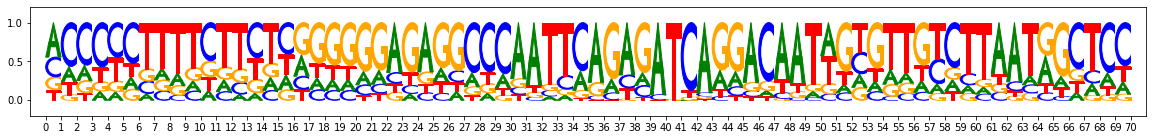

metacluster_0 pattern_21
total seqlets: 129
Task 0 hypothetical scores:


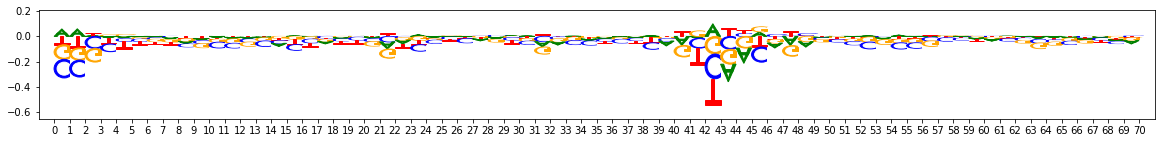

Task 0 actual importance scores:


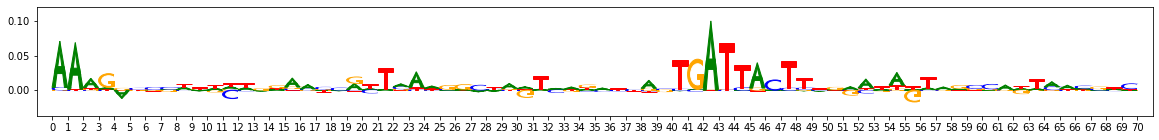

onehot, fwd and rev:


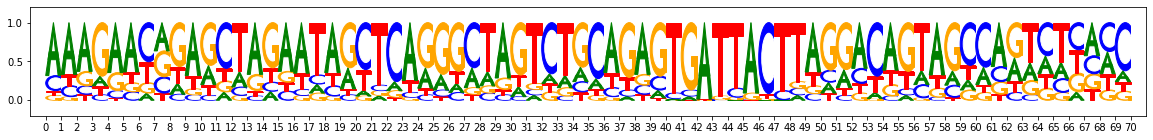

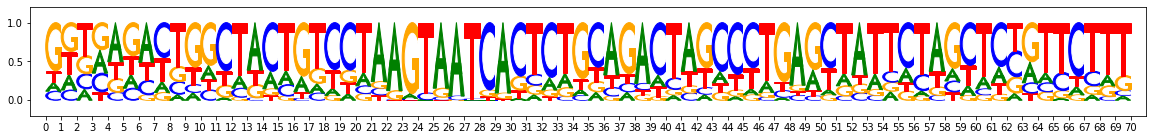

metacluster_0 pattern_22
total seqlets: 119
Task 0 hypothetical scores:


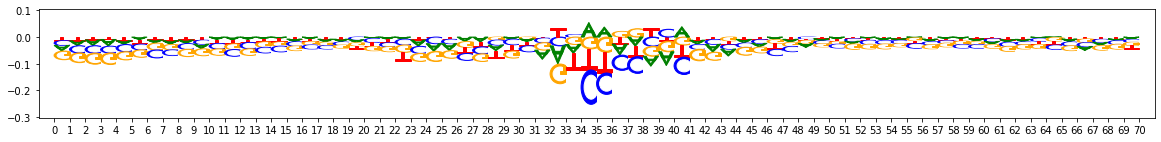

Task 0 actual importance scores:


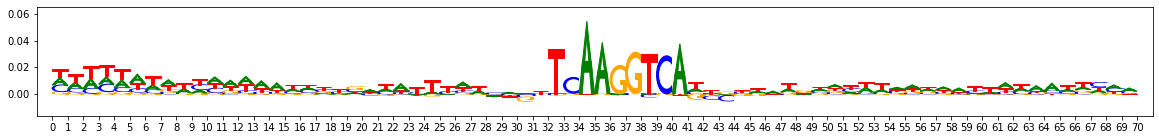

onehot, fwd and rev:


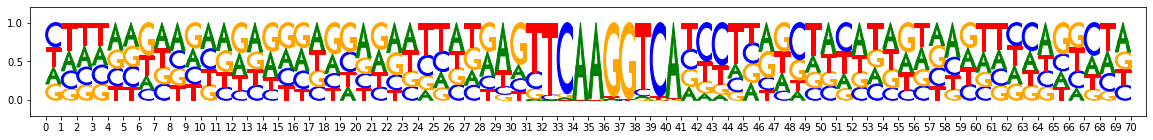

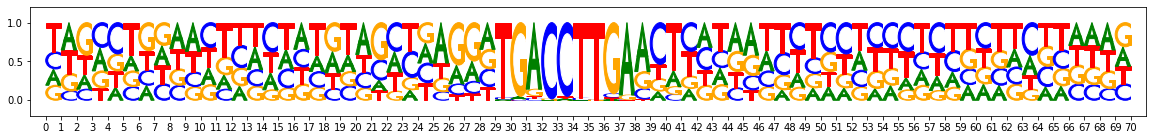

metacluster_0 pattern_23
total seqlets: 83
Task 0 hypothetical scores:


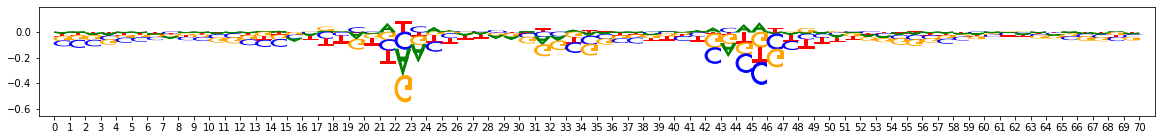

Task 0 actual importance scores:


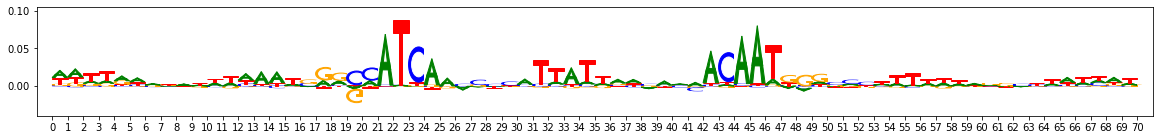

onehot, fwd and rev:


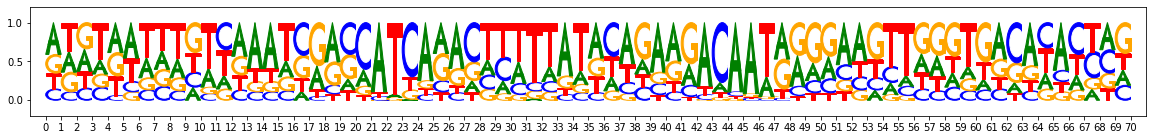

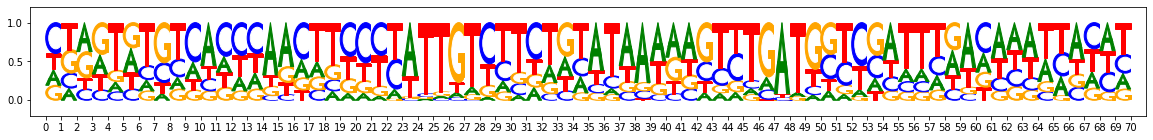

metacluster_0 pattern_24
total seqlets: 88
Task 0 hypothetical scores:


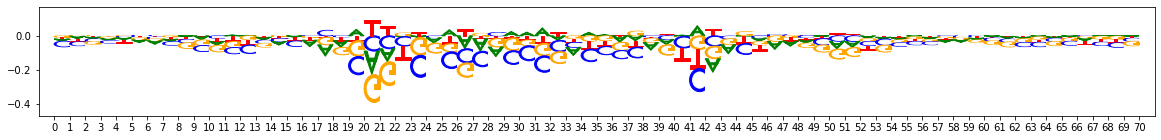

Task 0 actual importance scores:


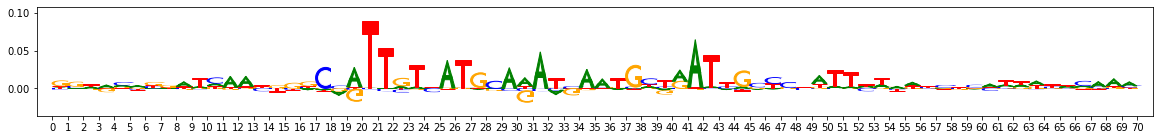

onehot, fwd and rev:


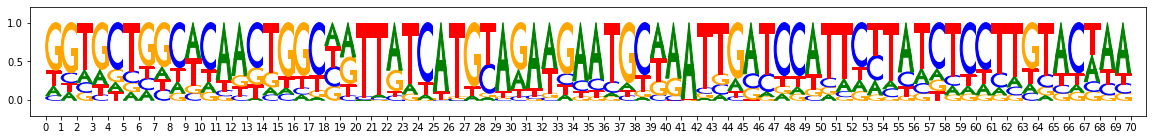

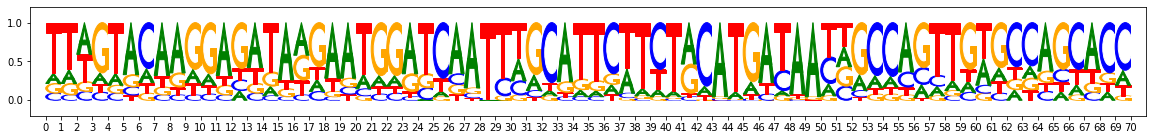

metacluster_0 pattern_25
total seqlets: 83
Task 0 hypothetical scores:


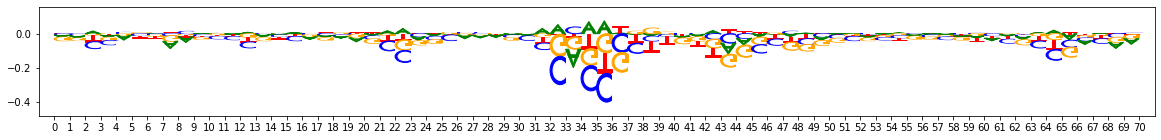

Task 0 actual importance scores:


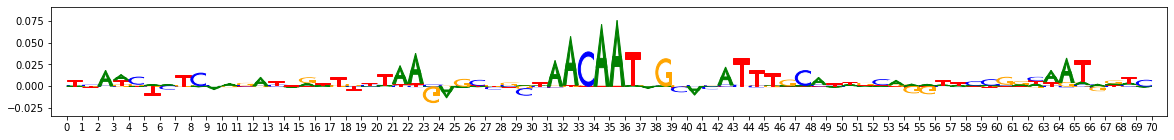

onehot, fwd and rev:


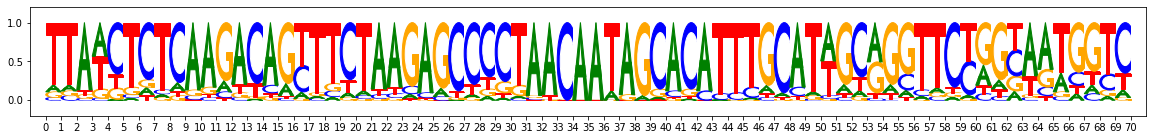

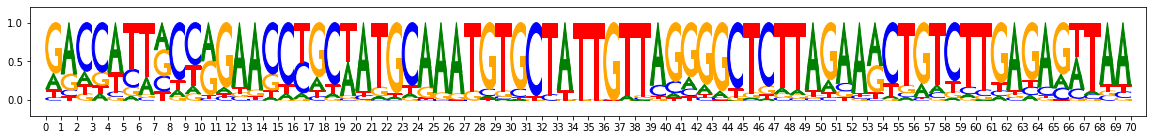

metacluster_0 pattern_26
total seqlets: 66
Task 0 hypothetical scores:


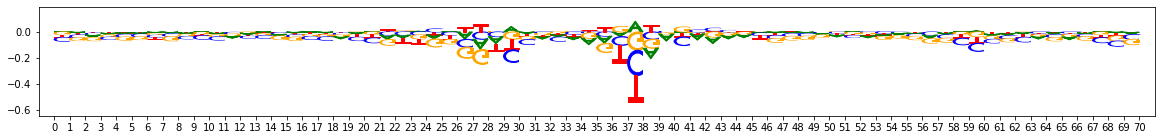

Task 0 actual importance scores:


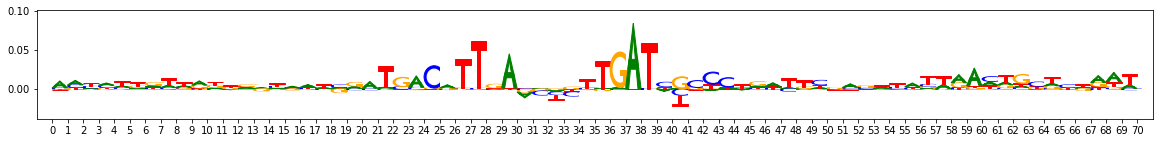

onehot, fwd and rev:


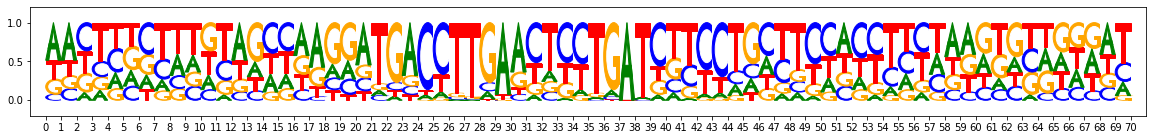

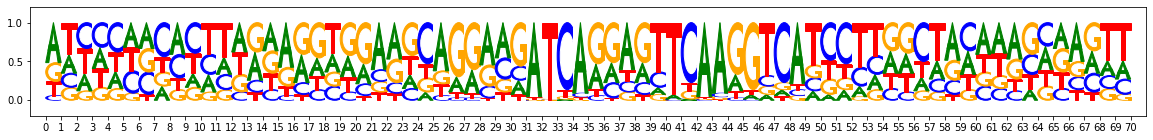

In [11]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()